# Data Visualization Homework

$\textbf{Ubah nama di bawah yaa!}$

- Nama: Benedikta Imelda
- Cita-cita masa muda: Wildlife biologist

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
telco = pd.read_csv("C:\\Users\Administrator\\OneDrive\Documents\I am paving my way to a data job\Week 8/WA_Fn-UseC_-Telco-Customer-Churn.csv")
pd.set_option('display.max_columns', None)
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Normal

## Dalam rata-rata, payment method mana yang memiliki monthly charge terbesar per customernya?

Hint: Gunakan groupby payment method terhadap monthly charge dengan aggregate function rata-rata

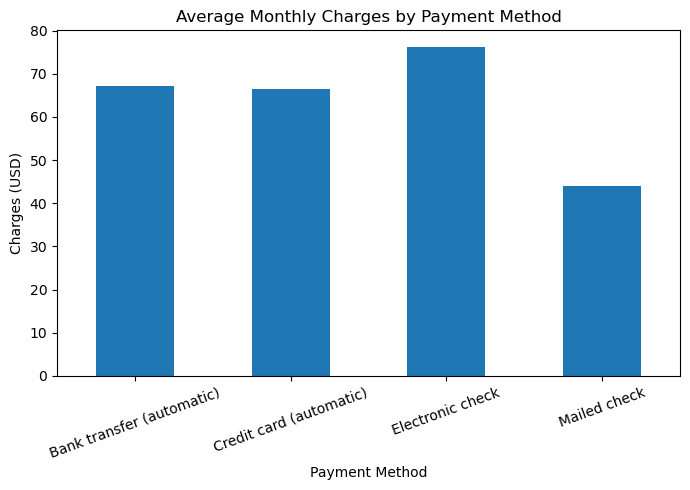

In [3]:
# select average(monthly_charge) from table groupby payment_method

payments = telco.groupby('PaymentMethod').agg({'MonthlyCharges':['mean']})
ax = payments.plot.bar(figsize = (7, 5), legend=False)
plt.xticks(rotation = 20)
plt.xlabel('Payment Method')
plt.ylabel('Charges (USD)')
plt.title('Average Monthly Charges by Payment Method')
plt.tight_layout()

Berdasarkan plot Payment Method, rata-rata tagihan bulanan tertinggi ditemukan pada metode pembayaran cek elektronik. Autodebet bank dan kartu kredit berimbang di urutan kedua dengan rata-rata sekitar 70 USD/bulan, dan angka terkecil ditemukan pada pembayaran lewat cek manual, 50 USD/bulan.

## Bagaimana jumlah customer dilihat dari tenure group?

Tenure group:
- low_tenure: User dengan tenure < 21 bulan
- medium_tenure: User dengan tenure 21 - 40 bulan
- high_tenure: User dengan tenure > 40 bulan

Hint:
- Memotong data integer menjadi group categorical dapat menggunakan beberapa macam cara, contohnya dengan numpy.where atau pandas.cut
- Mirip dengan plot pertama, namun ini menghitung jumlah unique users

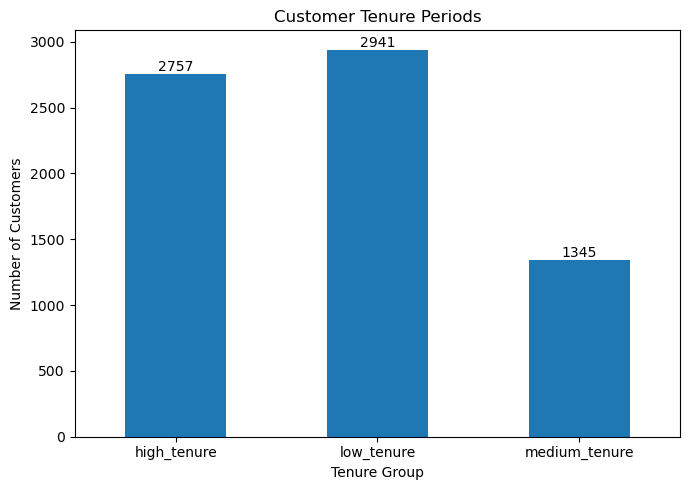

In [11]:
telco['TenureGroup'] = np.where(telco['tenure'] > 40, 'high_tenure',
                                       np.where(telco['tenure'] > 21, 'medium_tenure', 'low_tenure'))

#telco.head()

telco_tenure = telco.groupby('TenureGroup').agg({'TenureGroup':['count']})
ax = telco_tenure.plot.bar(figsize = (7, 5), legend = False)
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Customer Tenure Periods')
plt.xlabel('Tenure Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation = 0)
plt.tight_layout()

Berdasarkan plot Tenure Group, kebanyakan pelanggan menjalani tenure kurang dari 21 bulan (low tenure) atau lebih dari 40 bulan (high tenure). Dengan jumlah mendekati 1500, kelompok medium tenure adalah segmen pelanggan yang paling kecil dari penyedia layanan telecom ini.

## Apakah kebanyakan dari Senior Citizen berlangganan PhoneService?

Hint:
- Dapat menggunakan feature/input parameter hue pada seaborn
- Dalam menghitung jumlah unique customer, jangan lupa perhatikan angka rasio, tidak hanya angka absolutnya



In [12]:
# subtables: SeniorCitizen, PhoneService
# select count(customer_id) from SeniorCitizen join PhoneService on SeniorCitizen.customer_id = PhoneService.customer.id 

telco_ph = telco.groupby(['SeniorCitizen', 'PhoneService'])['customerID'].nunique().reset_index(name = 'distinct_cust')
telco_sc = telco.groupby(['SeniorCitizen'])['customerID'].nunique().reset_index(name = 'all_distinct_cust')

telco_senior = telco_ph.merge(telco_sc, how ='inner', on = 'SeniorCitizen')
telco_senior['Ratio']  = (telco_senior['distinct_cust']/telco_senior['all_distinct_cust']).round(2)
telco_senior

,SeniorCitizen,PhoneService,distinct_cust,all_distinct_cust,Ratio
0,0,No,578,5901,0.10
1,0,Yes,5323,5901,0.90
2,1,No,104,1142,0.09
3,1,Yes,1038,1142,0.91


(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

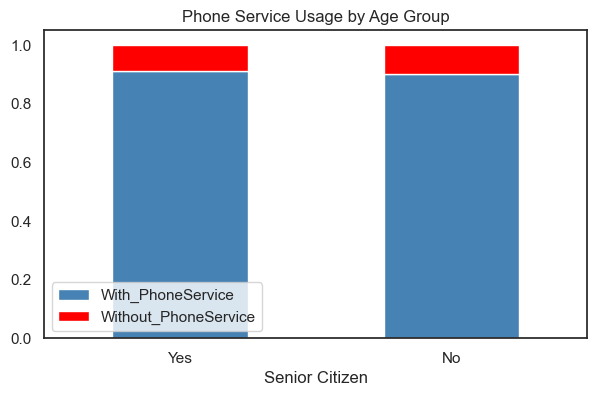

In [13]:
ratios = pd.DataFrame({'SeniorCitizen': ['Yes', 'No'],
                   'With_PhoneService': [0.91, 0.90],
                   'Without_PhoneService': [0.09, 0.10]})

sns.set(style='white')
ax = ratios.set_index('SeniorCitizen').plot(kind='bar', stacked=True, color=['steelblue', 'red'], figsize =(7, 4))
plt.title("Phone Service Usage by Age Group")
plt.xlabel('Senior Citizen')
plt.xticks(rotation = 0)

Dari plot penggunaan phone service, ditemukan mayoritas pelanggan usia lanjut mengambil paket layanan telepon; hanya 10% yang tidak menggunakan paket telepon.

## Bagaimana Distribusi dari TotalCharge?

Hint:
- Ubah datatype TotalCharge dari object ke int atau float
- Buat distribusi plot!

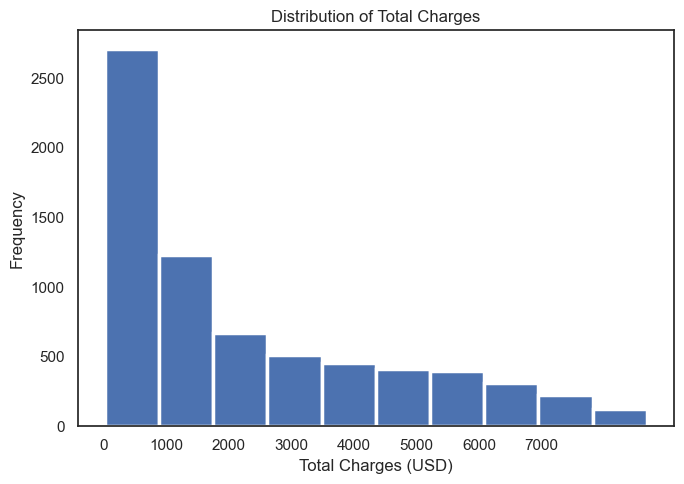

In [14]:
telco["TotalCharges"].fillna("No Charges", inplace = True)

telco_charge = telco[['TotalCharges']].apply(pd.to_numeric, errors='coerce')
ax = telco_charge.plot.hist(column = ['TotalCharges'], linewidth = 2.5, figsize = (7, 5), legend = False)

x = telco['TotalCharges']
plt.xticks(np.arange(0, len(x)+1, 1000))
plt.xlabel('Total Charges (USD)')
plt.title('Distribution of Total Charges')
plt.tight_layout()

Kebanyakan pelanggan memiliki total tagihan sampai USD 1000. Jumlah tersebut menurun hingga setengahnya pada tagihan 1000-2000 USD dan turun lagi hingga seperempatnya pada nilai tagihan 2000-3000 USD. Jumlah pelanggan dengan tagihan di atas 3000 USD menurun secara bertahap hingga penurunan besar pada nilai tagihan di atas 8000 USD.

# Intermediate

## Apakah customer yang memiliki monthly charges yang tinggi cenderung churn?

Hint: dapat ditunjukan melalui distribusi data

Text(0.5, 1.0, 'Churn Decision in Relation to Monthly Charges')

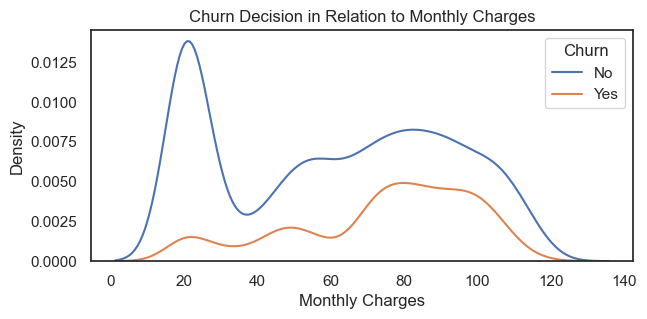

In [15]:
fig, ax = plt.subplots(1, 1, figsize = (7, 3))
sns.kdeplot(x = 'MonthlyCharges', data = telco, hue = 'Churn')
plt.xlabel('Monthly Charges')
plt.title('Churn Decision in Relation to Monthly Charges')

Berdasarkan plot Churn Decision, jumlah konsumen yang memutuskan churn cenderung meningkat dengan besaran tagihan dan ditemukan paling banyak pada angka tagihan bulanan 80 USD. Akan tetapi, jumlah ini berkurang pada jumlah tagihan 81-100 USD/bulan dan turun banyak pada konsumen yang ditagih lebih dari 100 USD/bulan.

## Bagaimana pengaruh memiliki partner & dependents terhadap tingkat churn customer?

Hint: concat partner dan dependents, gunakan parameter 'hue' pada seaborn untuk mempermudah

In [16]:
telcos = telco.copy()
telcos['partner-dependents'] = telcos['Partner'] + '-' + telcos['Dependents']
telcos['partner-dependents'].value_counts()

No-No      3280
Yes-Yes    1749
Yes-No     1653
No-Yes      361
Name: partner-dependents, dtype: int64

In [17]:
tg = telcos.groupby(['partner-dependents', 'Churn'])['customerID'].nunique().reset_index(name = 'distinct_cust')
th = telcos.groupby(['partner-dependents'])['customerID'].nunique().reset_index(name = 'all_distinct_cust')

tgh = tg.merge(th, how ='inner', on = 'partner-dependents')
tgh['Ratio']  = (tgh['distinct_cust']/tgh['all_distinct_cust']).round(2)
tgh

,partner-dependents,Churn,distinct_cust,all_distinct_cust,Ratio
0,No-No,No,2157,3280,0.66
1,No-No,Yes,1123,3280,0.34
2,No-Yes,No,284,361,0.79
3,No-Yes,Yes,77,361,0.21
4,Yes-No,No,1233,1653,0.75
5,Yes-No,Yes,420,1653,0.25
6,Yes-Yes,No,1500,1749,0.86
7,Yes-Yes,Yes,249,1749,0.14


(array([0, 1, 2, 3]),
 [Text(0, 0, 'No-No'),
  Text(1, 0, 'No-Yes'),
  Text(2, 0, 'Yes-No'),
  Text(3, 0, 'Yes-Yes')])

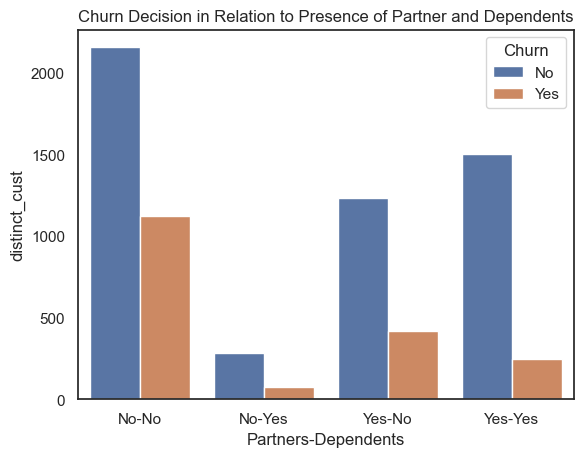

In [18]:
sns.barplot(x='partner-dependents', y='distinct_cust', data=tgh, hue = 'Churn')
plt.title("Churn Decision in Relation to Presence of Partner and Dependents")
plt.xlabel('Partners-Dependents')
plt.xticks(rotation = 0)

Dari plot Churn Decision, tidak dapat disimpulkan bahwa memiliki pasangan dan dependents memengaruhi keputusan berhenti berlangganan. 

# Soal Hard

## Buatlah satu insight dari data telco customer, dan sertakan storyline pada visualisasi tersebut! dengan hanya memanfaatkan atribut PaymentMethod, CustomerID, dan Churn!

In [19]:
pc = telco.groupby(['PaymentMethod', 'Churn'])['customerID'].nunique().reset_index(name = 'distinct_cust')
pm = telco.groupby(['PaymentMethod'])['customerID'].nunique().reset_index(name = 'all_distinct_cust')

pcm = pc.merge(pm, how ='inner', on = 'PaymentMethod')
pcm['Ratio']  = (pcm['distinct_cust']/pcm['all_distinct_cust']).round(2)
pcm

,PaymentMethod,Churn,distinct_cust,all_distinct_cust,Ratio
0,Bank transfer (automatic),No,1286,1544,0.83
1,Bank transfer (automatic),Yes,258,1544,0.17
2,Credit card (automatic),No,1290,1522,0.85
3,Credit card (automatic),Yes,232,1522,0.15
4,Electronic check,No,1294,2365,0.55
5,Electronic check,Yes,1071,2365,0.45
6,Mailed check,No,1304,1612,0.81
7,Mailed check,Yes,308,1612,0.19


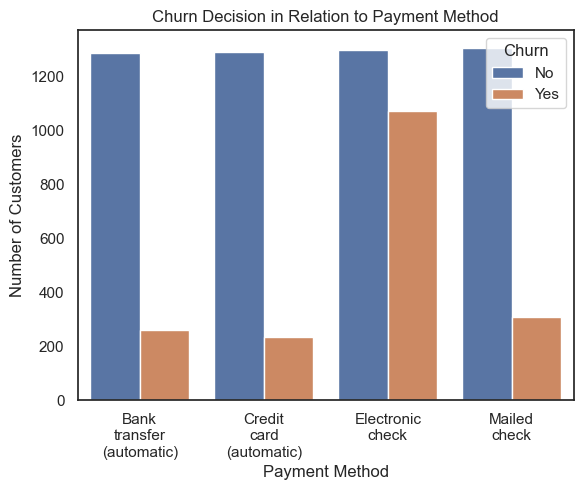

In [20]:
from textwrap import wrap
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

ax = sns.barplot(x='PaymentMethod', y='distinct_cust', data=pcm, hue = 'Churn')
plt.title("Churn Decision in Relation to Payment Method")
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(wrap = True, rotation = 20)
wrap_labels(ax, 10)

Dalam plot churn decision berdasarkan metode bayar, ditemukan jumlah pelanggan yang membayar dengan cek elektronik dan churn tidak berbeda signifikan dengan jumlah yang masih menggunakan layanan telecom. Proporsi ini tidak terlihat pada churn decision metode pembayaran lainnya - jauh lebih banyak pelanggan yang belum churn ketimbang yang sudah. Namun, untuk menarik kesimpulan bahwa metode bayar berpengaruh pada keputusan churning, akan dibutuhkan informasi tambahan.

### Insights lain

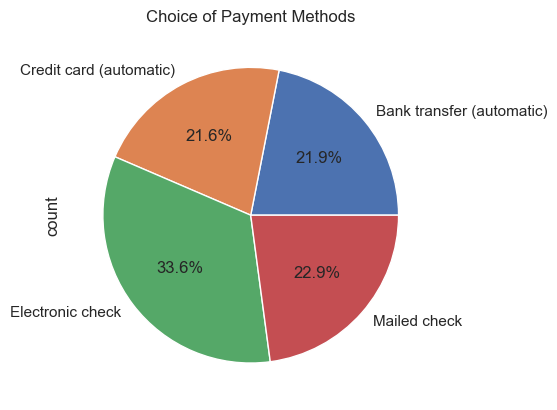

In [21]:
mapping = telco.groupby('PaymentMethod').agg({'customerID':['count']})
plot = mapping.plot.pie(y='customerID', title="Choice of Payment Methods", legend=False, autopct='%1.1f%%')

Dari 4 pilihan metode pembayaran tagihan, cek elektronik adalah metode yang paling banyak dipilih pelanggan, dan rasio pengguna metode bayar lainnya terbagi cukup rata.